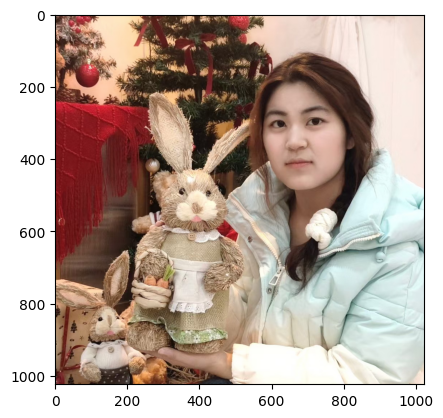

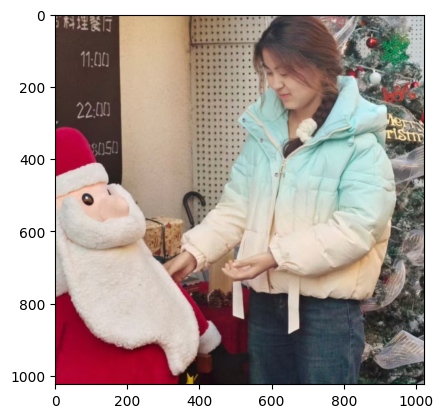

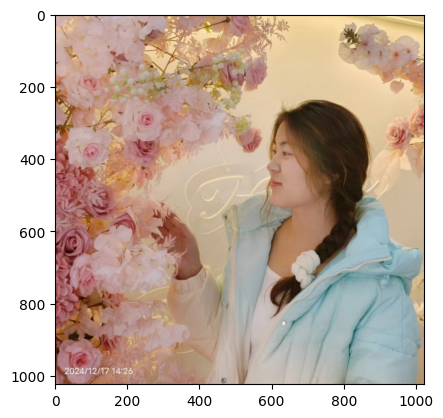

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()


img2 = cv2.imread('./images/pusiyue_chrismastreet_1024_1024.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()


img3 = cv2.imread('./images/pusiyue_rose_1024_1024.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

In [2]:
import torch 
print(torch.cuda.is_available())
device = ('cuda' if torch.cuda.is_available() else 'cpu' )
print(device)

True
cuda


In [3]:
import torch 
import numpy 
import matplotlib.pyplot as plt 
noiseGenerator = torch.Generator()
noiseGenerator.manual_seed(0)
noiseLevels = [0,10,50,75,100,250,500,750]
print(len(noiseLevels))
imageTensor = torch.tensor(np.array(img1)).to(device) 
#print(imageTensor/255.0*2-1)
BatchSize = len(noiseLevels)
print(BatchSize)
print(imageTensor.shape)
batch = imageTensor.repeat(BatchSize,1,1,1)
print(batch.shape)
timeSteps = torch.tensor(noiseLevels,dtype=torch.int,device = batch.device)
print(batch.device)
epsilons = torch.randn(batch.shape,device=batch.device)

betaStart = 0.00085
bataEnd = 0.0120
TimeSteps = 1000
betas = np.linspace(betaStart,bataEnd,TimeSteps)
alphas= 1 - betas 
print(betas)
print(alphas)


trainingSteps = 1000


8
8
torch.Size([1024, 1024, 3])
torch.Size([8, 1024, 1024, 3])
cuda:0
[0.00085    0.00086116 0.00087232 0.00088348 0.00089464 0.00090581
 0.00091697 0.00092813 0.00093929 0.00095045 0.00096161 0.00097277
 0.00098393 0.0009951  0.00100626 0.00101742 0.00102858 0.00103974
 0.0010509  0.00106206 0.00107322 0.00108438 0.00109555 0.00110671
 0.00111787 0.00112903 0.00114019 0.00115135 0.00116251 0.00117367
 0.00118483 0.001196   0.00120716 0.00121832 0.00122948 0.00124064
 0.0012518  0.00126296 0.00127412 0.00128529 0.00129645 0.00130761
 0.00131877 0.00132993 0.00134109 0.00135225 0.00136341 0.00137457
 0.00138574 0.0013969  0.00140806 0.00141922 0.00143038 0.00144154
 0.0014527  0.00146386 0.00147503 0.00148619 0.00149735 0.00150851
 0.00151967 0.00153083 0.00154199 0.00155315 0.00156431 0.00157548
 0.00158664 0.0015978  0.00160896 0.00162012 0.00163128 0.00164244
 0.0016536  0.00166476 0.00167593 0.00168709 0.00169825 0.00170941
 0.00172057 0.00173173 0.00174289 0.00175405 0.00176522 0.0

# forward ddpm add noise
![](forwardDDPM.jpg)

In [2]:
import torch
from StableDiffusion.DdpmSampler import DdpmSampler

randomGenerator = torch.Generator()
randomGenerator.manual_seed(42)
sampler = DdpmSampler(randomGenerator=randomGenerator,numTrainingSteps=1000,numInferenceSteps=50)
print(sampler.betas)
print(sampler.alphas)


[0.00085    0.00086116 0.00087232 0.00088348 0.00089464 0.00090581
 0.00091697 0.00092813 0.00093929 0.00095045 0.00096161 0.00097277
 0.00098393 0.0009951  0.00100626 0.00101742 0.00102858 0.00103974
 0.0010509  0.00106206 0.00107322 0.00108438 0.00109555 0.00110671
 0.00111787 0.00112903 0.00114019 0.00115135 0.00116251 0.00117367
 0.00118483 0.001196   0.00120716 0.00121832 0.00122948 0.00124064
 0.0012518  0.00126296 0.00127412 0.00128529 0.00129645 0.00130761
 0.00131877 0.00132993 0.00134109 0.00135225 0.00136341 0.00137457
 0.00138574 0.0013969  0.00140806 0.00141922 0.00143038 0.00144154
 0.0014527  0.00146386 0.00147503 0.00148619 0.00149735 0.00150851
 0.00151967 0.00153083 0.00154199 0.00155315 0.00156431 0.00157548
 0.00158664 0.0015978  0.00160896 0.00162012 0.00163128 0.00164244
 0.0016536  0.00166476 0.00167593 0.00168709 0.00169825 0.00170941
 0.00172057 0.00173173 0.00174289 0.00175405 0.00176522 0.00177638
 0.00178754 0.0017987  0.00180986 0.00182102 0.00183218 0.0018

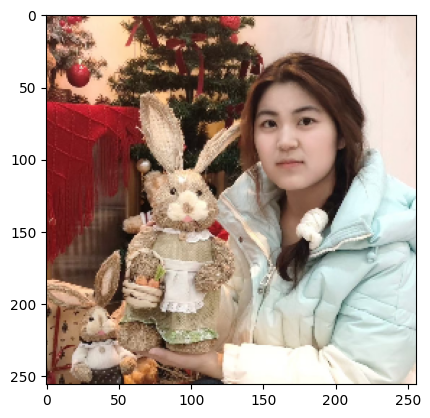

[0.99915    0.99828957 0.99741874 0.99653754 0.99564599 0.99474413
 0.99383198 0.99290958 0.99197695 0.99103412 0.99008113 0.98911801
 0.98814478 0.98716148 0.98616815 0.9851648  0.98415148 0.98312822
 0.98209505 0.98105201 0.97999912 0.97893642 0.97786395 0.97678174
 0.97568983 0.97458825 0.97347703 0.97235622 0.97122584 0.97008594
 0.96893655 0.9677777  0.96660944 0.96543181 0.96424483 0.96304855
 0.961843   0.96062823 0.95940427 0.95817116 0.95692894 0.95567766
 0.95441734 0.95314803 0.95186977 0.9505826  0.94928657 0.9479817
 0.94666805 0.94534565 0.94401455 0.94267479 0.9413264  0.93996944
 0.93860395 0.93722996 0.93584752 0.93445668 0.93305747 0.93164994
 0.93023414 0.92881011 0.9273779  0.92593754 0.92448908 0.92303257
 0.92156805 0.92009557 0.91861518 0.91712691 0.91563082 0.91412695
 0.91261534 0.91109605 0.90956912 0.9080346  0.90649253 0.90494297
 0.90338595 0.90182153 0.90024975 0.89867066 0.89708431 0.89549075
 0.89389003 0.89228219 0.89066729 0.88904536 0.88741647 0.88578

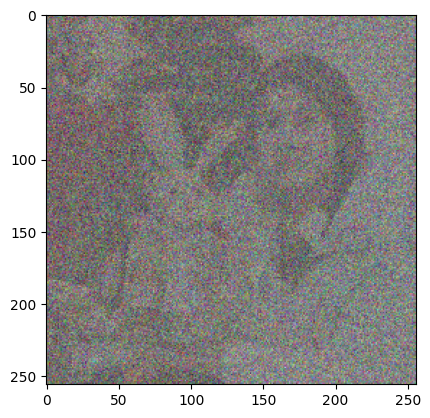

In [18]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(0,0),fx = 1/4,fy = 1/4)
plt.imshow(img1)
plt.show()

betaStart = 0.00085
bataEnd = 0.0120
TimeSteps = 1000
betas = np.linspace(betaStart,bataEnd,TimeSteps,endpoint=True)
alphas= 1 - betas 
alphas_bar = np.cumprod(alphas)
print(alphas_bar)
x0 = img1.copy()/255.0
x0 = x0
ImageShape = x0.shape



xt = x0
noisedImagesList = [xt] 
N = TimeSteps
for t in range(N):
    xt = (1-betas[t])**0.5 * xt + betas[t] * np.random.rand(*ImageShape)
    noisedImagesList.append(xt)

#print(xt)
normalizedXt = (xt - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()    

#print(betas)
#print(alphas)

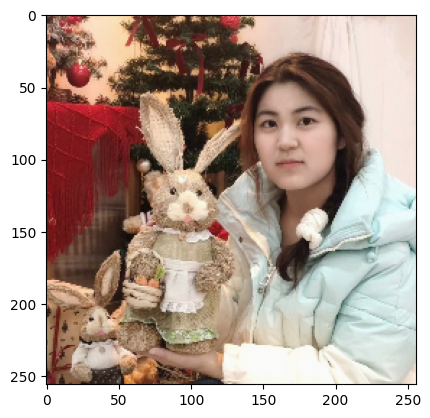

In [16]:
t = 100
xt = noisedImagesList[t]
normalizedXt = (xt - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()    

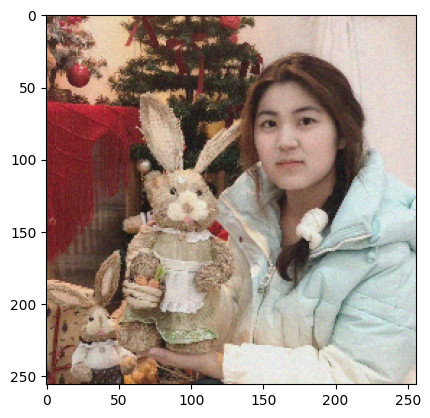

In [10]:
t = 400
xt = noisedImagesList[t]
normalizedXt = (xt - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()    

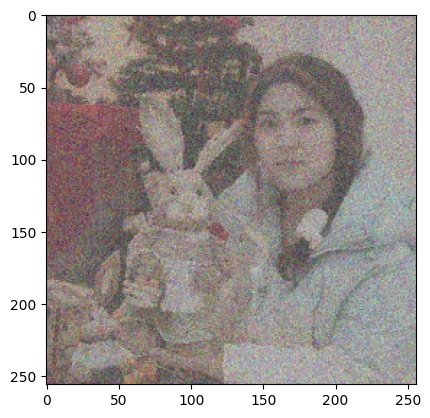

In [11]:
t = 800
xt = noisedImagesList[t]
normalizedXt = (xt - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()    

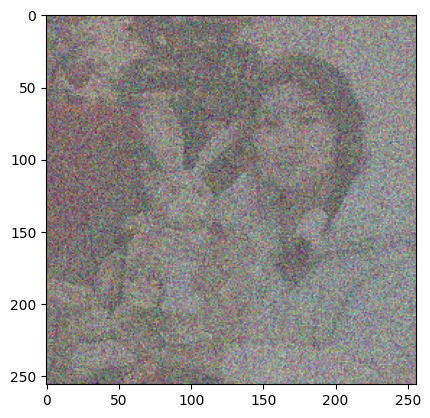

In [12]:
t = 950
xt = noisedImagesList[t]
normalizedXt = (xt - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()   

1001


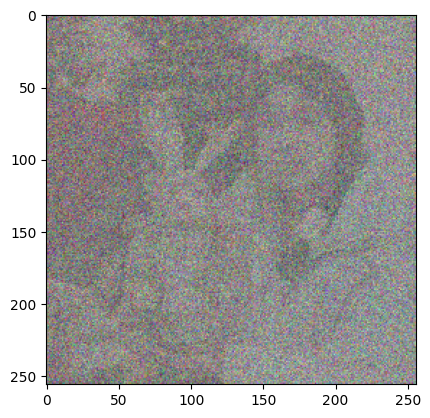

In [17]:
t = 1000
print(len(noisedImagesList))
xt = noisedImagesList[t]
normalizedXt = (xt - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()   

# 
![](forwardProcess.jpg)

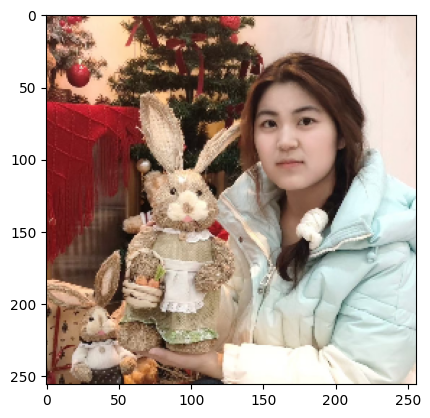

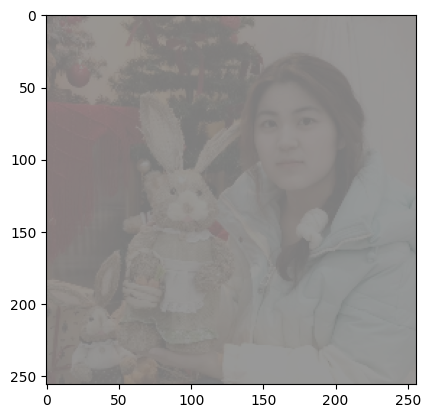

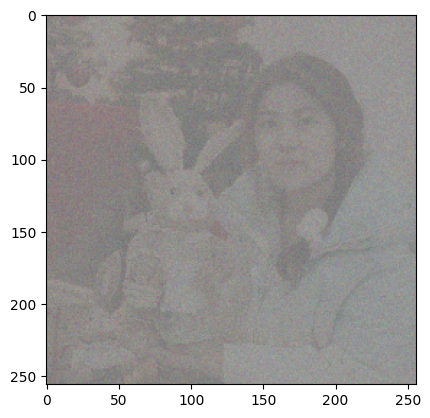

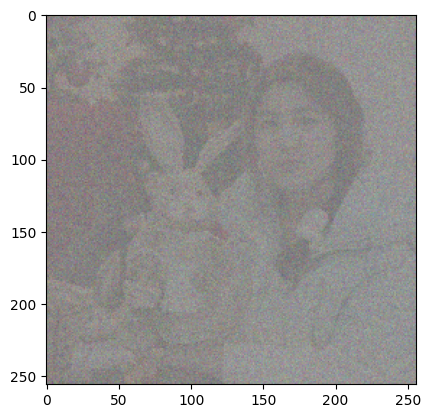

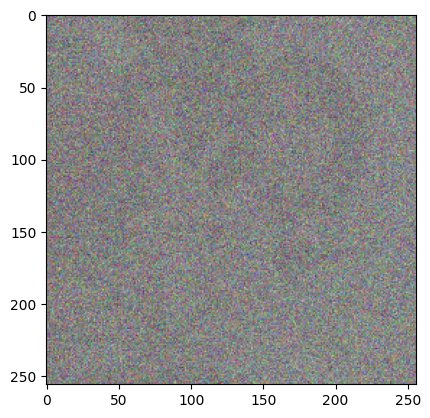

In [28]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(0,0),fx = 1/4,fy = 1/4)
plt.imshow(img1)
plt.show()

betaStart = 0.00085
bataEnd = 0.0120
TimeSteps = 1000
betas = np.linspace(betaStart,bataEnd,TimeSteps,endpoint=True)
alphas= 1 - betas 
alphas_bar = np.cumprod(alphas)

#print(alphas_bar)
x0 = img1.copy()/255.0
x0 = x0
ImageShape = x0.shape
xt = x0
noisedImagesList = [xt] 
N = TimeSteps
for t in range(N):
    xt = alphas_bar[t]**0.5 * x0  + (1-alphas_bar[t])**0.5 * np.random.randn(*ImageShape)
    noisedImagesList.append(xt)

#print(xt)
t = 0
img = noisedImagesList[t]
normalizedXt = (img - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()    


t = 50
img = noisedImagesList[t]
normalizedXt = (img - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()  


t = 100
img = noisedImagesList[t]
normalizedXt = (img - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()  

t = 500
img = noisedImagesList[t]
normalizedXt = (img - np.min(xt))/(np.max(xt) - np.min(xt))
plt.imshow(normalizedXt)
plt.show()  


# load model 

In [5]:
import StableDiffusion.ModelConverter
diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',device = 'cuda')
print(type(diffusionDict))


<class 'dict'>


In [6]:
import StableDiffusion.ModelConverter

diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cpu')
print(type(diffusionDict))

<class 'dict'>


In [9]:
for key in diffusionDict.keys():
    print(key)

for value in diffusionDict.values():
    print(value)

diffusionDict['clip']


         [[ 3.9612e-02,  2.6840e-02,  1.7456e-02],
          [ 2.5620e-02, -2.3937e-03, -8.4381e-03],
          [ 1.5961e-02,  3.0869e-02,  5.7602e-03]],

         [[ 5.1544e-02, -1.7853e-03, -2.0477e-02],
          [ 2.3666e-02,  1.4290e-02,  2.4490e-02],
          [ 1.0719e-02,  2.9465e-02,  1.2817e-02]],

         ...,

         [[-5.8533e-02,  4.4174e-03,  3.1281e-02],
          [-6.2683e-02,  2.1408e-02, -2.5742e-02],
          [-8.1177e-02,  2.5024e-02, -5.6152e-02]],

         [[ 1.8906e-02,  6.4636e-02,  2.1820e-03],
          [ 7.0679e-02,  7.7515e-02,  5.0201e-02],
          [ 3.6865e-02,  5.5847e-02,  5.2765e-02]],

         [[ 6.9542e-03,  2.6428e-02,  2.2018e-02],
          [ 6.7663e-04, -2.8397e-02,  3.5896e-03],
          [ 2.0538e-02, -3.9307e-02,  2.6810e-02]]],


        [[[-8.8348e-03, -3.4546e-02, -3.6163e-03],
          [-1.3229e-02, -3.9001e-02, -1.4008e-02],
          [-3.7567e-02, -1.9180e-02, -2.1301e-02]],

         [[-1.1620e-02, -2.1042e-02, -1.0824e-03],
 

# time embedding 
$$ \begin{align*}
f_k &= 10000^{-k / 160}, \quad k = 0, 1, \dots, 159 \\
x_k &= t \cdot f_k \\
\text{emb}(t) &= \begin{bmatrix}
\cos(x_0) \\ \sin(x_0) \\ \cos(x_1) \\ \sin(x_1) \\ \vdots \\ \cos(x_{159}) \\ \sin(x_{159})
\end{bmatrix}
\end{align*} $$


In [3]:
import numpy as np

def getTimeEmbedding(timeStep):
    t = timeStep
    frequency = np.arange(0,160) 
    frequency = -frequency/160
    frequency = 10000**frequency    
    xk = t *frequency 
    timeEmbeddingCos = np.cos(xk)
    timeEmbeddingSin = np.sin(xk)
    timeEmbedding = np.concatenate([timeEmbeddingCos,timeEmbeddingSin])
    timeEmbedding = timeEmbedding[None,:]   
    return timeEmbedding


timeStep = 50
timeEmbedding = getTimeEmbedding(timeStep)   

print(timeEmbedding)

[[ 0.86231887  0.98749543  0.39888152 -0.77537509 -0.62707243  0.9175974
  -0.10852954 -0.65172023  0.96538487 -0.99231615  0.95094026 -0.94966527
   0.9892502  -0.98177004  0.77374667 -0.23949966 -0.51482961  0.9933521
  -0.60277676 -0.48802106  0.9786827   0.00869587 -0.99590726  0.09613824
   0.99990372  0.15120992 -0.92258706 -0.65526861  0.45086046  0.99991465
   0.48296224 -0.47126053 -0.99008036 -0.73467644  0.01179122  0.71871513
   0.99973818  0.77672419  0.22272642 -0.39221384 -0.83907153 -0.9998747
  -0.87163479 -0.5311606  -0.08918207  0.34762744  0.69937578  0.9209621
   0.99965185  0.94715021  0.79013197  0.5617135   0.2950266   0.01912244
  -0.24309283 -0.47540467 -0.66785066 -0.81574436 -0.91849403 -0.97843313
  -0.99978607 -0.987824   -0.94822086 -0.88659395 -0.80820055 -0.71775824
  -0.61935807 -0.51644369 -0.41183422 -0.30777417 -0.20599762 -0.10779782
  -0.0140964   0.07449161  0.15759899  0.23505475  0.30683984  0.37304994
   0.43386475  0.48952296  0.54030231  0.5

[1.00000000e+00 9.44060876e-01 8.91250938e-01 8.41395142e-01
 7.94328235e-01 7.49894209e-01 7.07945784e-01 6.68343918e-01
 6.30957344e-01 5.95662144e-01 5.62341325e-01 5.30884444e-01
 5.01187234e-01 4.73151259e-01 4.46683592e-01 4.21696503e-01
 3.98107171e-01 3.75837404e-01 3.54813389e-01 3.34965439e-01
 3.16227766e-01 2.98538262e-01 2.81838293e-01 2.66072506e-01
 2.51188643e-01 2.37137371e-01 2.23872114e-01 2.11348904e-01
 1.99526231e-01 1.88364909e-01 1.77827941e-01 1.67880402e-01
 1.58489319e-01 1.49623566e-01 1.41253754e-01 1.33352143e-01
 1.25892541e-01 1.18850223e-01 1.12201845e-01 1.05925373e-01
 1.00000000e-01 9.44060876e-02 8.91250938e-02 8.41395142e-02
 7.94328235e-02 7.49894209e-02 7.07945784e-02 6.68343918e-02
 6.30957344e-02 5.95662144e-02 5.62341325e-02 5.30884444e-02
 5.01187234e-02 4.73151259e-02 4.46683592e-02 4.21696503e-02
 3.98107171e-02 3.75837404e-02 3.54813389e-02 3.34965439e-02
 3.16227766e-02 2.98538262e-02 2.81838293e-02 2.66072506e-02
 2.51188643e-02 2.371373

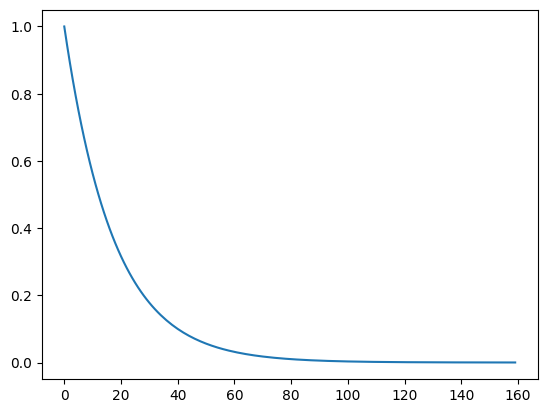

(1, 320)


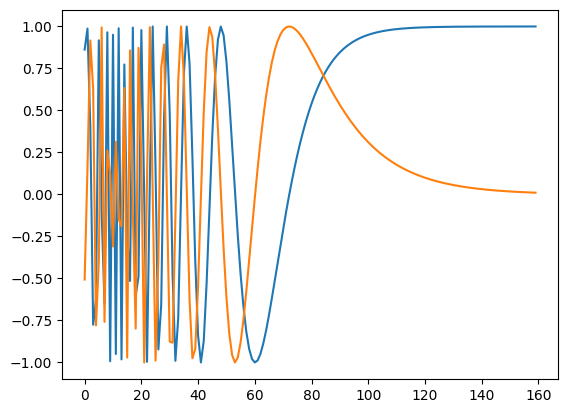

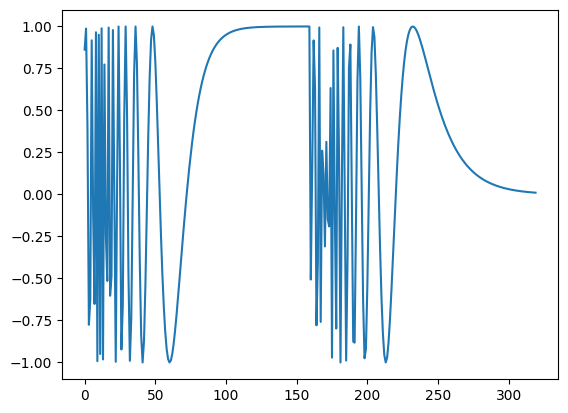

In [6]:


frequency = np.arange(0,160) 
frequency = -frequency/160
frequency = 10000**frequency
t  =100 
xk = t *frequency 
print(frequency)
plt.plot(frequency)
plt.show()
timeEmbeddingCos = np.cos(xk)
timeEmbeddingSin = np.sin(xk)
timeEmbedding = np.concatenate([timeEmbeddingCos,timeEmbeddingSin])
timeEmbedding = timeEmbedding[None,:]
print(timeEmbedding.shape)
plt.plot(timeEmbeddingCos)
plt.plot(timeEmbeddingSin)
plt.show()
plt.plot(timeEmbedding[0])
plt.show()


#  tokenizer 

you may need to install the package 
!pip install ftfy


In [63]:
#!pip install ftfy


In [5]:
import transformers 
import numpy as np 
#from transformers import CLIPTokenizer
tokenizer = transformers.CLIPTokenizer(vocab_file="./models/vocab.json", merges_file="./models/merges.txt")
print(tokenizer)


CLIPTokenizer(name_or_path='', vocab_size=49408, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	49407: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
)


In [6]:
# text to image 
prompt_pos ='a photof of a girl walking in the snowing college'
prompt_neg ='not clear'
isCFG = True
cfg_scale = 7  #min 1 max 14

samplerType = 'ddpm'
inferenceSteps = 50
randomSeed = 42
Width = 512
Height = 512
LatentWidth = 512//8
LatenHeight = 512//8
lantentImage = np.random.randn(1,4,LatenHeight,LatentWidth) 


# reverse step
![](reverseStep.jpg)